In [1]:
# Step 1: Import libraries
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision import models
from timm import create_model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

c:\Users\shenl\OneDrive\Documents\Skin Cancer Prediction\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training label mapping:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
Test dataset class_to_idx:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
Label mapping matches test_dataset.class_to_idx. Proceeding with evaluation.


C:\Users\shenl\AppData\Local\Temp\ipykernel_10560\2059344025.py:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(MODEL_PATH, map_location=d

Classification Report:

              precision    recall  f1-score   support

       akiec       0.45      0.13      0.20       100
         bcc       0.61      0.41      0.49       100
         bkl       0.36      0.14      0.20       100
          df       0.53      0.18      0.27        50
         mel       0.47      0.15      0.23       100
          nv       0.54      0.99      0.70       350
        vasc       0.86      0.38      0.53        50

    accuracy                           0.54       850
   macro avg       0.55      0.34      0.37       850
weighted avg       0.53      0.54      0.47       850



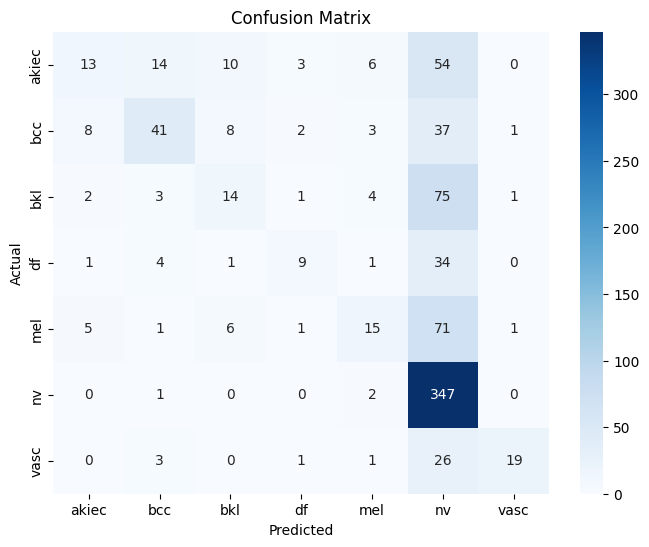

In [7]:

# Step 2: Set paths and parameters
MODEL_PATH = "final_efficientnet_b3_skin_cancer.pth"
TEST_DIR = "HAM10000/ISIC/dataset_by_class"  # <-- CHANGE THIS!
BATCH_SIZE = 32
NUM_CLASSES = 7
CLASS_NAMES = sorted(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
label_mapping = {name: idx for idx, name in enumerate(CLASS_NAMES)}

# Step 3: Define transforms (ImageNet-style)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Step 4: Load test dataset
test_dataset = datasets.ImageFolder(TEST_DIR, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Training label mapping:")
print(label_mapping)
print("Test dataset class_to_idx:")
print(test_dataset.class_to_idx)

if label_mapping != test_dataset.class_to_idx:
    print("WARNING: Label mapping and test_dataset.class_to_idx do NOT match!")
    print("Evaluation results will be incorrect. Fix your label mapping and test folder structure.")
else:
    print("Label mapping matches test_dataset.class_to_idx. Proceeding with evaluation.")

# Step 5: Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = create_model("efficientnet_b3", pretrained=False, num_classes=NUM_CLASSES)
model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
model.to(device)
model.eval()

# Step 6: Evaluate model
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 7: Metrics
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=CLASS_NAMES))

# Step 8: Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

C:\Users\shenl\AppData\Local\Temp\ipykernel_17964\2391094555.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_resnet50_skin_cancer

Classification Report:

              precision    recall  f1-score   support

       akiec       0.34      0.20      0.25       100
         bcc       0.59      0.56      0.57       100
         bkl       0.32      0.21      0.25       100
          df       0.83      0.10      0.18        50
         mel       0.44      0.18      0.26       100
          nv       0.61      0.97      0.75       350
        vasc       0.95      0.40      0.56        50

    accuracy                           0.57       850
   macro avg       0.58      0.37      0.40       850
weighted avg       0.55      0.57      0.51       850



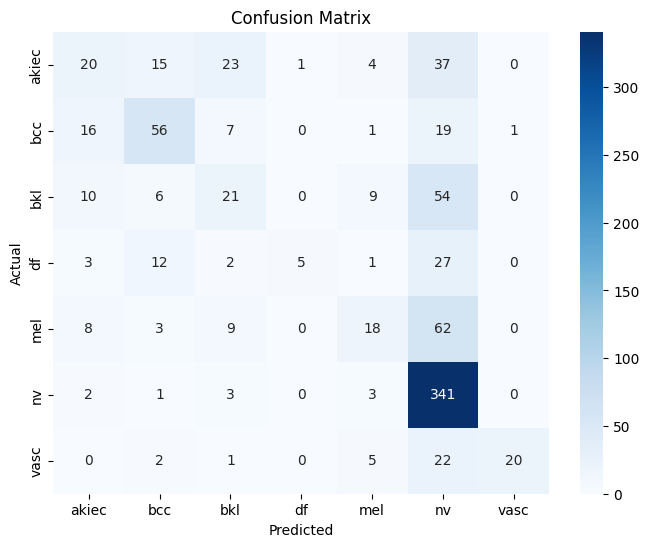

In [10]:
# Step 2: Set paths and parameters
MODEL_PATH = "best_resnet50_skin_cancer.pth"
TEST_DIR = "HAM10000/ISIC/dataset_by_class"  # <-- CHANGE THIS!
BATCH_SIZE = 32
NUM_CLASSES = 7
CLASS_NAMES = sorted(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
label_mapping = {name: idx for idx, name in enumerate(CLASS_NAMES)}

# Step 3: Define transforms (ImageNet-style)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Step 4: Load test dataset
test_dataset = datasets.ImageFolder(TEST_DIR, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Training label mapping:")
print(label_mapping)
print("Test dataset class_to_idx:")
print(test_dataset.class_to_idx)

if label_mapping != test_dataset.class_to_idx:
    print("WARNING: Label mapping and test_dataset.class_to_idx do NOT match!")
    print("Evaluation results will be incorrect. Fix your label mapping and test folder structure.")
else:
    print("Label mapping matches test_dataset.class_to_idx. Proceeding with evaluation.")

# Step 5: Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Recreate model architecture as used during training
model = models.resnet50(weights=None)
model.fc = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(model.fc.in_features, 7)  # make sure 7 matches your number of classes
)

# Load trained weights
model.load_state_dict(torch.load("best_resnet50_skin_cancer.pth", map_location=device))
model.to(device)
model.eval()

# Step 6: Evaluate model
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 7: Metrics
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=CLASS_NAMES))

# Step 8: Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Training label mapping:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
Test dataset class_to_idx:
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
Label mapping matches test_dataset.class_to_idx. Proceeding with evaluation.


C:\Users\shenl\AppData\Local\Temp\ipykernel_10560\701955860.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_resnet50_skin_cancerV

Classification Report:

              precision    recall  f1-score   support

       akiec       0.33      0.27      0.30       100
         bcc       0.05      0.27      0.08       100
         bkl       0.00      0.00      0.00       100
          df       0.04      0.04      0.04        50
         mel       0.00      0.00      0.00       100
          nv       0.03      0.01      0.01       350
        vasc       0.00      0.00      0.00        50

    accuracy                           0.07       850
   macro avg       0.06      0.08      0.06       850
weighted avg       0.06      0.07      0.05       850



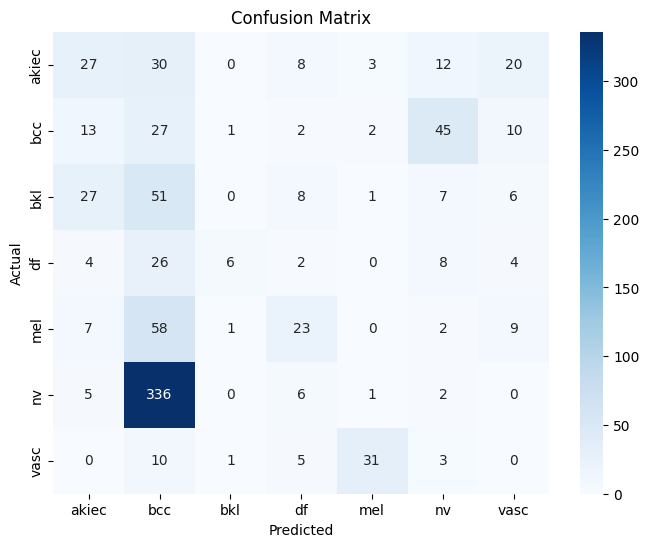

In [8]:
# Step 2: Set paths and parameters
MODEL_PATH = "best_resnet50_skin_cancerV3.pth"
TEST_DIR = "HAM10000/ISIC/dataset_by_class"  # <-- CHANGE THIS!
BATCH_SIZE = 32
NUM_CLASSES = 7
CLASS_NAMES = sorted(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
label_mapping = {name: idx for idx, name in enumerate(CLASS_NAMES)}

# Step 3: Define transforms (ImageNet-style)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Step 4: Load test dataset
test_dataset = datasets.ImageFolder(TEST_DIR, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Training label mapping:")
print(label_mapping)
print("Test dataset class_to_idx:")
print(test_dataset.class_to_idx)

if label_mapping != test_dataset.class_to_idx:
    print("WARNING: Label mapping and test_dataset.class_to_idx do NOT match!")
    print("Evaluation results will be incorrect. Fix your label mapping and test folder structure.")
else:
    print("Label mapping matches test_dataset.class_to_idx. Proceeding with evaluation.")

# Step 5: Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Recreate model architecture as used during training
model = models.resnet50(weights=None)
model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.fc.in_features, 7)  # make sure 7 matches your number of classes
)

# Load trained weights
model.load_state_dict(torch.load("best_resnet50_skin_cancerV3.pth", map_location=device))
model.to(device)
model.eval()

# Step 6: Evaluate model
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Step 7: Metrics
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=CLASS_NAMES))

# Step 8: Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

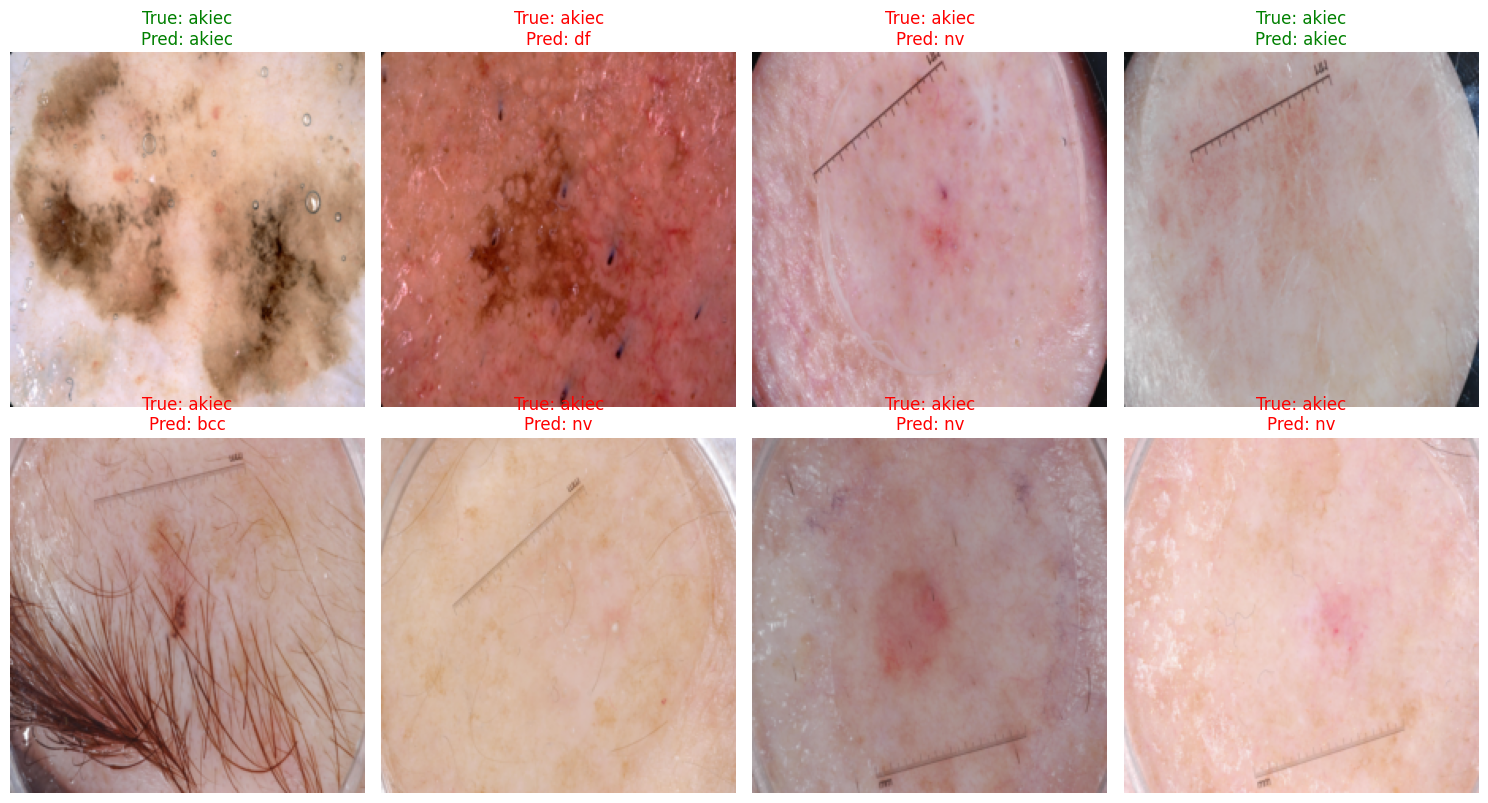


Batch Accuracy: 15.62%
akiec: 35.34%
bcc: 19.12%
bkl: 1.86%
df: 11.38%
mel: 2.98%
nv: 24.03%
vasc: 5.30%


In [16]:
# Visualize some sample predictions
import random
import torchvision

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Get predictions for this batch
images = images.to(device)
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Convert tensors to numpy for visualization
images = images.cpu()
preds = preds.cpu().numpy()
labels = labels.numpy()

# Create a grid of images
num_images = min(8, len(images))  # Display up to 8 images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for idx in range(num_images):
    # Denormalize the image
    img = images[idx].numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    # Plot image
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Add title with true and predicted labels
    true_label = CLASS_NAMES[labels[idx]]
    pred_label = CLASS_NAMES[preds[idx]]
    color = 'green' if true_label == pred_label else 'red'
    axes[idx].set_title(f'True: {true_label}\nPred: {pred_label}', color=color)

plt.tight_layout()
plt.show()

# Print accuracy for this batch
batch_accuracy = (preds == labels).mean()
print(f"\nBatch Accuracy: {batch_accuracy:.2%}")

# Show prediction probabilities for the first image
softmax = nn.Softmax(dim=1)
probabilities = softmax(outputs)[0].cpu().numpy()
for class_name, prob in zip(CLASS_NAMES, probabilities):
    print(f"{class_name}: {prob:.2%}")

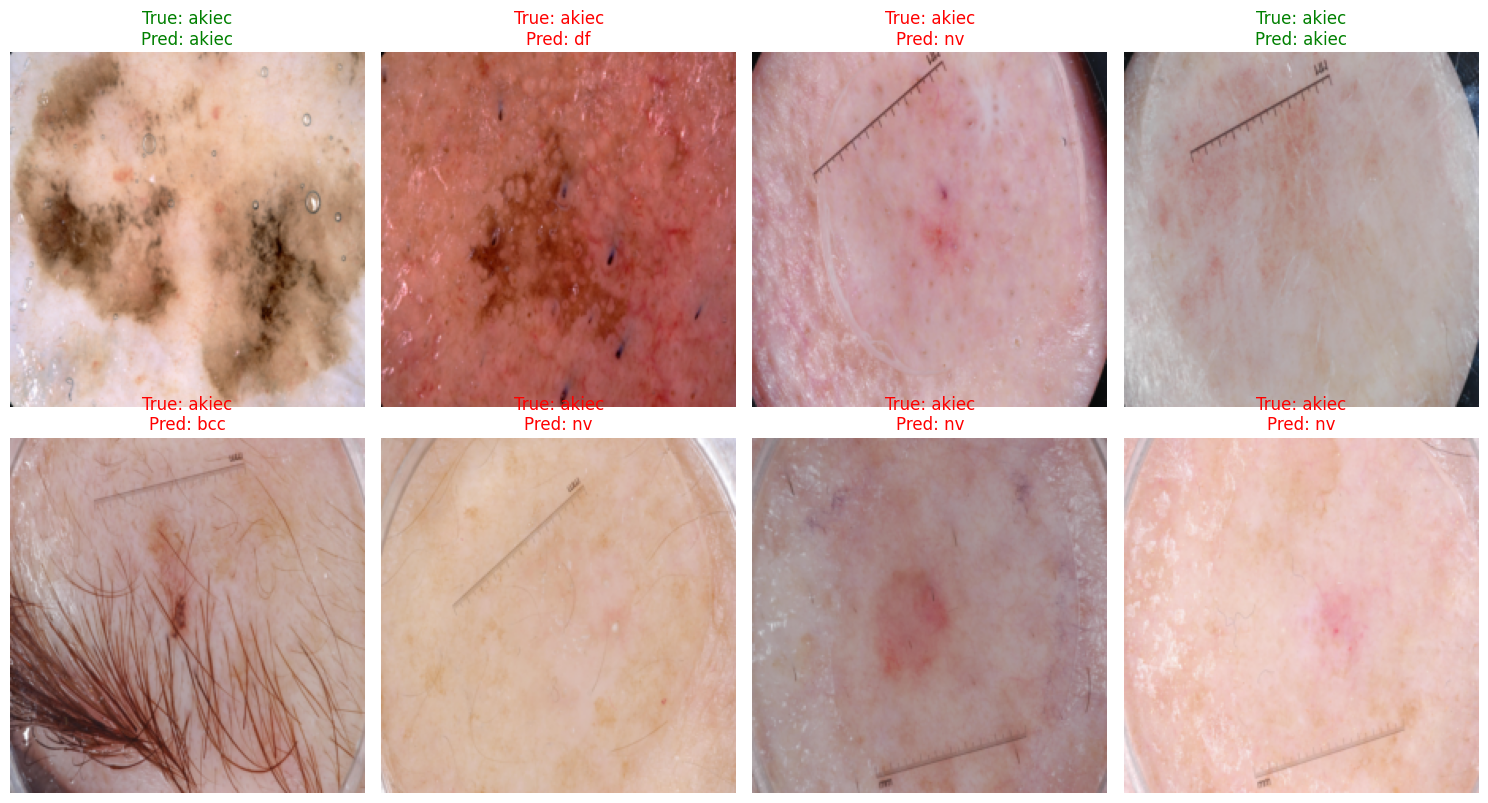


Batch Accuracy: 15.62%
akiec: 35.34%
bcc: 19.12%
bkl: 1.86%
df: 11.38%
mel: 2.98%
nv: 24.03%
vasc: 5.30%


In [19]:
# Set random seeds for reproducibility
RANDOM_SEED = 11  # You can change this number to get different but consistent results
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(RANDOM_SEED)

# Create a new DataLoader with shuffle=False for consistent ordering
test_loader_fixed = torch.utils.data.DataLoader(
    test_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    worker_init_fn=lambda worker_id: np.random.seed(RANDOM_SEED)
)

# Get a batch of test images
dataiter = iter(test_loader_fixed)
images, labels = next(dataiter)

# Get predictions for this batch
images = images.to(device)
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Convert tensors to numpy for visualization
images = images.cpu()
preds = preds.cpu().numpy()
labels = labels.numpy()

# Create a grid of images
num_images = min(8, len(images))  # Display up to 8 images
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.ravel()

for idx in range(num_images):
    # Denormalize the image
    img = images[idx].numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    # Plot image
    axes[idx].imshow(img)
    axes[idx].axis('off')
    
    # Add title with true and predicted labels
    true_label = CLASS_NAMES[labels[idx]]
    pred_label = CLASS_NAMES[preds[idx]]
    color = 'green' if true_label == pred_label else 'red'
    axes[idx].set_title(f'True: {true_label}\nPred: {pred_label}', color=color)

plt.tight_layout()
plt.show()

# Print accuracy for this batch
batch_accuracy = (preds == labels).mean()
print(f"\nBatch Accuracy: {batch_accuracy:.2%}")

# Show prediction probabilities for the first image
softmax = nn.Softmax(dim=1)
probabilities = softmax(outputs)[0].cpu().numpy()
for class_name, prob in zip(CLASS_NAMES, probabilities):
    print(f"{class_name}: {prob:.2%}")